In [19]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import mpl_toolkits
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [20]:
df = pd.read_csv('business.csv')
df=df.astype(str)
df.drop(['state','categories'],axis=1,inplace=True)
df.head(3)

,business_id,name,stars,Alcohol,BikeParking,GoodForKids,HasTV,OutdoorSeating,RestaurantsReservations,WiFi,garage_parking,street_parking,lot_parking
0,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,4.5,'none',False,False,True,False,False,nan,nan,nan,nan
1,CsLQLiRoafpJPJSkNX2h5Q,Middle East Deli,3.0,nan,nan,True,nan,False,False,nan,False,False,False
2,eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,4.5,u'none',True,nan,True,False,False,u'no',False,False,True


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

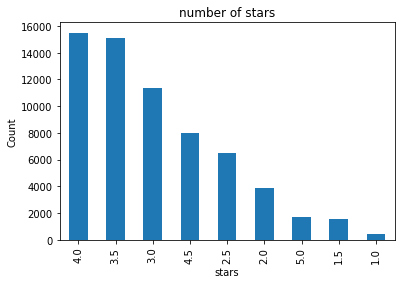

In [21]:
df['stars'].value_counts().plot(kind='bar')
plt.title('number of stars')
plt.xlabel('stars')
plt.ylabel('Count')
sns.despine

In [22]:
df.loc[df['Alcohol'].str.contains('nan'), 'Alcohol'] = '0'
df.loc[df['Alcohol'].str.contains('none'), 'Alcohol'] = '0'
df.loc[df['Alcohol'].str.contains('None'), 'Alcohol'] = '0'
df.loc[df['Alcohol'].str.contains('full_bar'), 'Alcohol'] = '1'
df.loc[df['Alcohol'].str.contains('beer_and_wine'), 'Alcohol'] = '1'

In [23]:
df.loc[df['BikeParking'].str.contains('nan'), 'BikeParking'] = '0'
df.loc[df['BikeParking'].str.contains('False'), 'BikeParking'] = '0'
df.loc[df['BikeParking'].str.contains('True'), 'BikeParking'] = '1'
df.loc[df['BikeParking'].str.contains('None'), 'BikeParking'] = '0'
df.loc[df['GoodForKids'].str.contains('nan'), 'GoodForKids'] = '0'
df.loc[df['GoodForKids'].str.contains('False'), 'GoodForKids'] = '0'
df.loc[df['GoodForKids'].str.contains('True'), 'GoodForKids'] = '1'
df.loc[df['GoodForKids'].str.contains('None'), 'GoodForKids'] = '0'
df.loc[df['HasTV'].str.contains('nan'), 'HasTV'] = '0'
df.loc[df['HasTV'].str.contains('False'), 'HasTV'] = '0'
df.loc[df['HasTV'].str.contains('None'), 'HasTV'] = '0'
df.loc[df['HasTV'].str.contains('True'), 'HasTV'] = '1'
df.loc[df['OutdoorSeating'].str.contains('nan'), 'OutdoorSeating'] = '0'
df.loc[df['OutdoorSeating'].str.contains('False'), 'OutdoorSeating'] = '0'
df.loc[df['OutdoorSeating'].str.contains('None'), 'OutdoorSeating'] = '0'
df.loc[df['OutdoorSeating'].str.contains('True'), 'OutdoorSeating'] = '1'
df.loc[df['RestaurantsReservations'].str.contains('nan'), 'RestaurantsReservations'] = '0'
df.loc[df['RestaurantsReservations'].str.contains('False'), 'RestaurantsReservations'] = '0'
df.loc[df['RestaurantsReservations'].str.contains('None'), 'RestaurantsReservations'] = '0'
df.loc[df['RestaurantsReservations'].str.contains('True'), 'RestaurantsReservations'] = '1'
df.loc[df['WiFi'].str.contains('nan'), 'WiFi'] = '0'
df.loc[df['WiFi'].str.contains('no'), 'WiFi'] = '0'
df.loc[df['WiFi'].str.contains('None'), 'WiFi'] = '0'
df.loc[df['WiFi'].str.contains('paid'), 'WiFi'] = '0'
df.loc[df['WiFi'].str.contains('free'), 'WiFi'] = '1'
df.loc[df['WiFi'].str.contains('yes'), 'WiFi'] = '1'
df.loc[df['garage_parking'].str.contains('nan'), 'garage_parking'] = '0'
df.loc[df['garage_parking'].str.contains('False'), 'garage_parking'] = '0'
df.loc[df['garage_parking'].str.contains('None'), 'garage_parking'] = '0'
df.loc[df['garage_parking'].str.contains('True'), 'garage_parking'] = '1'
df.loc[df['street_parking'].str.contains('nan'), 'street_parking'] = '0'
df.loc[df['street_parking'].str.contains('False'), 'street_parking'] = '0'
df.loc[df['street_parking'].str.contains('None'), 'street_parking'] = '0'
df.loc[df['street_parking'].str.contains('True'), 'street_parking'] = '1'
df.loc[df['lot_parking'].str.contains('nan'), 'lot_parking'] = '0'
df.loc[df['lot_parking'].str.contains('False'), 'lot_parking'] = '0'
df.loc[df['lot_parking'].str.contains('None'), 'lot_parking'] = '0'
df.loc[df['lot_parking'].str.contains('True'), 'lot_parking'] = '1'
df.head(5)

,business_id,name,stars,Alcohol,BikeParking,GoodForKids,HasTV,OutdoorSeating,RestaurantsReservations,WiFi,garage_parking,street_parking,lot_parking
0,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,4.5,0,0,0,1,0,0,0,0,0,0
1,CsLQLiRoafpJPJSkNX2h5Q,Middle East Deli,3.0,0,0,1,0,0,0,0,0,0,0
2,eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,4.5,0,1,0,1,0,0,0,0,0,1
3,lu7vtrp_bE9PnxWfA8g4Pg,Banzai Sushi,4.5,0,0,1,0,0,0,0,0,0,0
4,9sRGfSVEfLhN_km60YruTA,Apadana Restaurant,3.0,1,0,0,1,1,1,1,0,1,0


In [37]:
X=df[['Alcohol', 'BikeParking','GoodForKids', 'HasTV','OutdoorSeating','RestaurantsReservations','WiFi','garage_parking','street_parking','lot_parking']]
Y=df[['stars']]
ps=0.35
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20000)
print('Train - Predictors shape', x_train.shape)
print('Test - Predictors shape', x_test.shape)
print('Train - Target shape', y_train.shape)
print('Test - Target shape', y_test.shape)

Train - Predictors shape (51155, 10)
Test - Predictors shape (12789, 10)
Train - Target shape (51155, 1)
Test - Target shape (12789, 1)


In [30]:
cls = linear_model.LinearRegression()
cls.fit(x_train,y_train)

LinearRegression()

In [31]:
prediction = cls.predict(x_test)
cls.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [38]:
print('Model R^2 Square value', metrics.r2_score(y_test, prediction)+ps)

Model R^2 Square value 0.4008472679935926
